In [2]:
## All reviews for Oxford restaurants
import pandas as pd
import os

df = pd.read_csv('oxf_df.csv')

df.head()

Unnamed: 0  Unnamed: 0_x     Facility Name  \
0           0          2472  Brick House Cafe   
1           1          2472  Brick House Cafe   
2           2          2472  Brick House Cafe   
3           3          2472  Brick House Cafe   
4           4          2472  Brick House Cafe   

                              Inspection Type Inspection Date  Critical  \
0  Standard/Critical Control Point Inspection       26-Oct-22       1.0   
1  Standard/Critical Control Point Inspection       26-Oct-22       1.0   
2  Standard/Critical Control Point Inspection       26-Oct-22       1.0   
3  Standard/Critical Control Point Inspection       26-Oct-22       1.0   
4  Standard/Critical Control Point Inspection       26-Oct-22       1.0   

   Non-Critical  Unnamed: 0_y   Restaurant Name    Phone Number  \
0           1.0           138  Brick House Cafe  (513) 916-6000   
1           1.0           139  Brick House Cafe  (513) 916-6000   
2           1.0           140  Brick House Cafe  (513) 916-6000   
3           1.0           141  Brick House Cafe  (513) 916-6000   
4           1.0           142  Brick House Cafe  (513) 916-6000   

                           Address  \
0  11 W Church St Oxford, OH 45056   
1  11 W Church St Oxford, OH 45056   
2  11 W Church St Oxford, OH 45056   
3  11 W Church St Oxford, OH 45056   
4  11 W Church St Oxford, OH 45056   

                                              Review  
0  1/2 price regular sushi rolls Sunday-Tuesday a...  
1  This place's name is very deceiving as it's mo...  
2  Super slow service. But they have half off sus...  
3  I ordered one California roll and it took over...  
4  The food was really good and well priced. It d...

In [5]:
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Restaurant Name'], axis = 1, inplace = True)

In [75]:
df.head()

Facility Name                             Inspection Type  \
0  Brick House Cafe  Standard/Critical Control Point Inspection   
1  Brick House Cafe  Standard/Critical Control Point Inspection   
2  Brick House Cafe  Standard/Critical Control Point Inspection   
3  Brick House Cafe  Standard/Critical Control Point Inspection   
4  Brick House Cafe  Standard/Critical Control Point Inspection   

  Inspection Date  Critical  Non-Critical    Phone Number  \
0       26-Oct-22       1.0           1.0  (513) 916-6000   
1       26-Oct-22       1.0           1.0  (513) 916-6000   
2       26-Oct-22       1.0           1.0  (513) 916-6000   
3       26-Oct-22       1.0           1.0  (513) 916-6000   
4       26-Oct-22       1.0           1.0  (513) 916-6000   

                           Address  \
0  11 W Church St Oxford, OH 45056   
1  11 W Church St Oxford, OH 45056   
2  11 W Church St Oxford, OH 45056   
3  11 W Church St Oxford, OH 45056   
4  11 W Church St Oxford, OH 45056   

                                              Review  \
0  1/2 price regular sushi rolls Sunday-Tuesday a...   
1  This place's name is very deceiving as it's mo...   
2  Super slow service. But they have half off sus...   
3  I ordered one California roll and it took over...   
4  The food was really good and well priced. It d...   

                                    Review_processed  
0  price regular sushi rolls cannot wrong bowls g...  
1  place name deceiving asian place seating feeli...  
2   super slow service half sushi worth know waiting  
3  ordered one california roll took hour literall...  
4  really good well priced take long get got roll...

In [7]:
import re

# Remove punctuation
df['Review_processed'] = \
df['Review'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['Review_processed'] = \
df['Review_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df['Review_processed'].head()

0    1/2 price regular sushi rolls sunday-tuesday a...
1    this place's name is very deceiving as it's mo...
2    super slow service but they have half off sush...
3    i ordered one california roll and it took over...
4    the food was really good and well priced it di...
Name: Review_processed, dtype: object

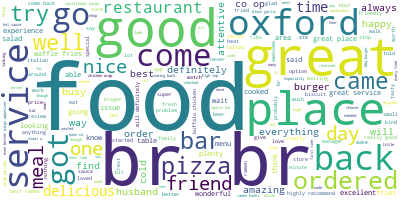

In [9]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['Review_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word clouddata
wordcloud.to_image()

In [66]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'br','food','waffle', 'fries','pizza', 'hot', 'sauce', 
                   'black', 'garlic', 'buffalo', 'chicken', 'ramen', 'hachi', 'friend', 'restaurant', 'oxford',
                   'chicken', 'wrap', 'cauliflower', 'wings', 'always', 'sports', 'bar', 'tzatziki', 'sauce','co', 'op', 
                   'college bar', 'wings appetizer', 'poke', 'bowl', 'salad','beer','tower','cajun','beans',
                    'bbq','burger','mac', 'cheese','day','move','come','back','go','sunday','monday','tuesday','wednesday'
                  'bacon', 'thursday','friday','italian','french','dip','biscuits','daughter','high','top','definitely'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = df.Review_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['price', 'regular', 'sushi', 'rolls', 'cannot', 'wrong', 'bowls', 'great', 'super', 'friendly', 'service']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/smudaml/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
temp = []
for i in data_words:
    str_joined = ' '.join(i)
    temp.append(str_joined)

In [68]:
temp

['price regular sushi rolls cannot wrong bowls great super friendly service',
 'place name deceiving asian place seating feeling mother got cobb loved thought little plastic orb comes super cute got volcano roll spicy scallop sushi smothered spicy mayo super messy delicious also got mango milk tea tapioca pearls pretty good life changing reason review low somehow cost us three items absolutely ridiculous price',
 'super slow service half sushi worth know waiting',
 'ordered one california roll took hour literally told would take long tell paid sit wait eat super frustrating sushi good though',
 'really good well priced take long get got rolls took less minutes think pretty fast place covid friendly workers nice place also clean recommend looking sushi soon try bowls',
 'super delicious highly recommend people build many options',
 'price regular sushi rolls cannot wrong bowls great super friendly service',
 'place name deceiving asian place seating feeling mother got cobb loved thought

In [69]:
long_string = ','.join(data_words)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

TypeError: sequence item 0: expected str instance, list found

In [70]:
df['Review_processed']=temp
df

Facility Name                             Inspection Type  \
0    Brick House Cafe  Standard/Critical Control Point Inspection   
1    Brick House Cafe  Standard/Critical Control Point Inspection   
2    Brick House Cafe  Standard/Critical Control Point Inspection   
3    Brick House Cafe  Standard/Critical Control Point Inspection   
4    Brick House Cafe  Standard/Critical Control Point Inspection   
..                ...                                         ...   
344      Skippers Pub  Standard/Critical Control Point Inspection   
345      Skippers Pub  Standard/Critical Control Point Inspection   
346      Skippers Pub  Standard/Critical Control Point Inspection   
347      Skippers Pub  Standard/Critical Control Point Inspection   
348      Skippers Pub  Standard/Critical Control Point Inspection   

    Inspection Date  Critical  Non-Critical    Phone Number  \
0         26-Oct-22       1.0           1.0  (513) 916-6000   
1         26-Oct-22       1.0           1.0  (513) 916-6000   
2         26-Oct-22       1.0           1.0  (513) 916-6000   
3         26-Oct-22       1.0           1.0  (513) 916-6000   
4         26-Oct-22       1.0           1.0  (513) 916-6000   
..              ...       ...           ...             ...   
344       25-Oct-21       4.0          11.0  (513) 523-0066   
345       25-Oct-21       4.0          11.0  (513) 523-0066   
346       25-Oct-21       4.0          11.0  (513) 523-0066   
347       25-Oct-21       4.0          11.0  (513) 523-0066   
348       25-Oct-21       4.0          11.0  (513) 523-0066   

                             Address  \
0    11 W Church St Oxford, OH 45056   
1    11 W Church St Oxford, OH 45056   
2    11 W Church St Oxford, OH 45056   
3    11 W Church St Oxford, OH 45056   
4    11 W Church St Oxford, OH 45056   
..                               ...   
344   121 E High St Oxford, OH 45056   
345   121 E High St Oxford, OH 45056   
346   121 E High St Oxford, OH 45056   
347   121 E High St Oxford, OH 45056   
348   121 E High St Oxford, OH 45056   

                                                Review  \
0    1/2 price regular sushi rolls Sunday-Tuesday a...   
1    This place's name is very deceiving as it's mo...   
2    Super slow service. But they have half off sus...   
3    I ordered one California roll and it took over...   
4    The food was really good and well priced. It d...   
..                                                 ...   
344  This is probably the worst place ever my ass w...   
345  Went here two times in one day! Amazing philly...   
346  Best cheeseburger and fries, as well as, servi...   
347  Many thanks to Andy for planning and executing...   
348  The best bar in Oxford. Easiest way to get a d...   

                                      Review_processed  
0    price regular sushi rolls cannot wrong bowls g...  
1    place name deceiving asian place seating feeli...  
2     super slow service half sushi worth know waiting  
3    ordered one california roll took hour literall...  
4    really good well priced take long get got roll...  
..                                                 ...  
344  probably worst place ever ass whole burning ba...  
345  went two times one amazing philly steaks lunch...  
346  best cheeseburger well service new favorite ol...  
347  many thanks andy planning executing excellent ...  
348  best easiest way get drink summer possibly tim...  

[349 rows x 9 columns]

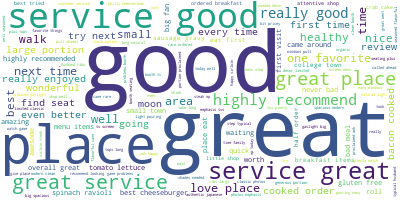

In [71]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['Review_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word clouddata
wordcloud.to_image()

In [ ]:
## All negative reviews for Butler County restaurants

In [74]:
import pandas as pd
import os

neg_reviews = pd.read_csv('neg_reviews.csv')

neg_reviews.head()

Unnamed: 0  Unnamed: 0.1                    Restaurant Name  Phone Number  \
0         362           362              Eli's BBQ - Riverside           NaN   
1         400           400              Eli's BBQ - Riverside           NaN   
2         668           668                   Mazunte Taqueria           NaN   
3         899           899                   Taft's Ale House           NaN   
4        1115          1115  Taste of Belgium - Over The Rhine           NaN   

                                        Address  \
0        3313 Riverside Dr Cincinnati, OH 45226   
1        3313 Riverside Dr Cincinnati, OH 45226   
2  5207 Madison Rd Ste 100 Cincinnati, OH 45227   
3             1429 Race St Cincinnati, OH 45202   
4             1135 Vine St Cincinnati, OH 45202   

                                              Review       Date    pos    neg  \
0  Eight years later and they are still cranking ...  7/12/2022  0.000  0.269   
1  Pulled pork was dry and flavorless. The atmosp...  3/18/2022  0.120  0.229   
2  Nothing Mex about this Mex joint. So many 5 st...   8/2/2022  0.000  0.336   
3  Bad food. I went in and got a drink and a sand...  8/30/2022  0.000  0.212   
4  Both myself and my friend got horrible, horrib...  3/16/2022  0.072  0.286   

     neu    comp  
0  0.731 -0.7905  
1  0.651 -0.2911  
2  0.664 -0.9448  
3  0.788 -0.7101  
4  0.642 -0.8994

In [77]:
neg_reviews.drop(columns = ['Unnamed: 0', 'Phone Number', 'Unnamed: 0.1', 'Address'], axis = 1, inplace = True)

In [78]:
neg_reviews.head()

Restaurant Name  \
0              Eli's BBQ - Riverside   
1              Eli's BBQ - Riverside   
2                   Mazunte Taqueria   
3                   Taft's Ale House   
4  Taste of Belgium - Over The Rhine   

                                              Review       Date    pos    neg  \
0  Eight years later and they are still cranking ...  7/12/2022  0.000  0.269   
1  Pulled pork was dry and flavorless. The atmosp...  3/18/2022  0.120  0.229   
2  Nothing Mex about this Mex joint. So many 5 st...   8/2/2022  0.000  0.336   
3  Bad food. I went in and got a drink and a sand...  8/30/2022  0.000  0.212   
4  Both myself and my friend got horrible, horrib...  3/16/2022  0.072  0.286   

     neu    comp  
0  0.731 -0.7905  
1  0.651 -0.2911  
2  0.664 -0.9448  
3  0.788 -0.7101  
4  0.642 -0.8994

In [79]:
import re

# Remove punctuation
neg_reviews['Review_processed'] = \
neg_reviews['Review'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
neg_reviews['Review_processed'] = \
neg_reviews['Review_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
neg_reviews['Review_processed'].head()

0    eight years later and they are still cranking ...
1    pulled pork was dry and flavorless the atmosph...
2    nothing mex about this mex joint so many 5 sta...
3    bad food i went in and got a drink and a sandw...
4    both myself and my friend got horrible horribl...
Name: Review_processed, dtype: object

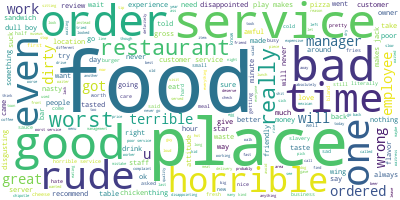

In [80]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(neg_reviews['Review_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word clouddata
wordcloud.to_image()

In [88]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'br','food','waffle', 'fries','pizza', 'hot', 'sauce', 
                   'black', 'garlic', 'buffalo', 'chicken', 'ramen', 'hachi', 'friend', 'restaurant', 'oxford',
                   'chicken', 'wrap', 'cauliflower', 'wings', 'always', 'sports', 'bar', 'tzatziki', 'sauce','co', 'op', 
                   'college bar', 'wings appetizer', 'poke', 'bowl', 'salad','beer','tower','cajun','beans',
                    'bbq','burger','mac', 'cheese','day','move','come','back','go','sunday','monday','tuesday','wednesday'
                  'bacon', 'thursday','friday','italian','french','dip','biscuits','daughter','high','top','definitely',
                   'manager','ordered','will','employee','place','time','dull'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = neg_reviews.Review_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['eight', 'years', 'later', 'still', 'cranking', 'knock', 'dead', 'keep', 'smokin', 'gets', 'better']


In [89]:
neg = []
for i in data_words:
    str_joined = ' '.join(i)
    neg.append(str_joined)

In [90]:
neg

['eight years later still cranking knock dead keep smokin gets better',
 'pulled pork dry flavorless atmosphere certainly funky plain dirty',
 'nothing mex mex joint many star reviews bad many star reviews bad many star reviews bad many star reviews bad',
 'bad went got drink sandwich lukewarm meat good first years finish meal',
 'got horrible horrible horrible poisoning eating sick two days ended going hospital symptoms say really enjoyed puking two days worth',
 'service terrible get get refills water trailer good frozen grocery store salt seasoning awful enjoyed waffles brussels sprouts good',
 'could give zero stars would absolute worst zoo ever half exhibits closed almost every gift shop something closed animals missing stuff broken disaster never horrid',
 'disappointed sea bass service king crab well done half regular size portion check screwed amazingly fixed immediately seemed strange weird done correctly first pass sent shame',
 'disappointing kid working nice nothing himthe 

In [91]:
neg_reviews['Review_processed']=neg
neg_reviews

Restaurant Name  \
0                Eli's BBQ - Riverside   
1                Eli's BBQ - Riverside   
2                     Mazunte Taqueria   
3                     Taft's Ale House   
4    Taste of Belgium - Over The Rhine   
..                                 ...   
612               United Dairy Farmers   
613                   Papa Johns Pizza   
614       Vinoklet Winery & Restaurant   
615                  Hot Head Burritos   
616                            Wendy's   

                                                Review        Date    pos  \
0    Eight years later and they are still cranking ...   7/12/2022  0.000   
1    Pulled pork was dry and flavorless. The atmosp...   3/18/2022  0.120   
2    Nothing Mex about this Mex joint. So many 5 st...    8/2/2022  0.000   
3    Bad food. I went in and got a drink and a sand...   8/30/2022  0.000   
4    Both myself and my friend got horrible, horrib...   3/16/2022  0.072   
..                                                 ...         ...    ...   
612  The rudest girl was there serving ice cream. T...   5/10/2022  0.000   
613  Great pizza but terrible customer service. The...  12/27/2013  0.075   
614  Beautiful property wth hints of classic Americ...   7/15/2017  0.415   
615  This has to be the worst hot head location I'v...   6/23/2022  0.000   
616  Terrible customer service the employees laugh ...   5/22/2021  0.125   

       neg    neu    comp                                   Review_processed  
0    0.269  0.731 -0.7905  eight years later still cranking knock dead ke...  
1    0.229  0.651 -0.2911  pulled pork dry flavorless atmosphere certainl...  
2    0.336  0.664 -0.9448  nothing mex mex joint many star reviews bad ma...  
3    0.212  0.788 -0.7101  bad went got drink sandwich lukewarm meat good...  
4    0.286  0.642 -0.8994  got horrible horrible horrible poisoning eatin...  
..     ...    ...     ...                                                ...  
612  0.296  0.704 -0.9187  rudest girl serving ice cream talking bladder ...  
613  0.366  0.559 -0.8979  great terrible customer service employees nast...  
614  0.253  0.332  0.5994  beautiful property wth hints classic americana...  
615  0.225  0.775 -0.9383  worst head location ever almost taste rice har...  
616  0.285  0.590 -0.5615  terrible customer service employees laugh tryi...  

[617 rows x 8 columns]

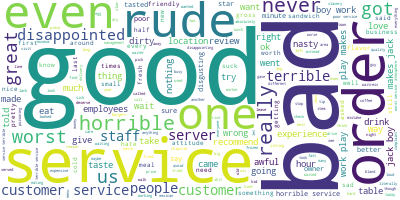

In [92]:
# Join the different processed titles together.
long_string = ','.join(list(neg_reviews['Review_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word clouddata
wordcloud.to_image()